In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.7f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('borough_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GSS_CODE                          33 non-null     object 
 1   London_borough                    33 non-null     object 
 2   housing_price                     33 non-null     int64  
 3   Personal_wellbeing_average_score  33 non-null     float64
 4   mean_income                       33 non-null     int64  
 5   median_income                     33 non-null     int64  
 6   employment_rate                   33 non-null     float64
 7   population                        33 non-null     int64  
 8   OA_percentage_metro               33 non-null     float64
 9   OA_percentage_walk                33 non-null     float64
 10  fertility_rate                    33 non-null     int64  
 11  gcse_results                      33 non-null     float64
 12  IMD_score 

In [4]:
df.head()

,GSS_CODE,London_borough,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
0,E09000001,City of London,797505,3.1000000,128000,54200,87.2000000,9721,14.3300000,40.1700000,60,53.0000000,11.1500000
1,E09000002,Barking & Dagenham,298338,2.8200000,29400,25700,69.8000000,212906,13.0100000,3.7100000,77,49.7000000,34.2000000
2,E09000003,Barnet,520524,3.1900000,51600,30700,73.9000000,395869,17.3200000,4.1000000,62,60.1000000,16.6400000
3,E09000004,Bexley,336988,3.2100000,36000,28000,75.6000000,248287,1.6700000,3.7000000,60,53.5000000,16.7100000
4,E09000005,Brent,474732,2.4000000,37800,26200,72.8000000,329771,18.1500000,4.5600000,73,53.1000000,30.5000000


In [5]:
df.describe()

,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
count,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000
mean,"523,239.8484848",3.0990909,"57,169.6969697","32,233.3333333",74.8515152,"271,575.4242424",14.7106061,6.8566667,59.3636364,53.2757576,24.9021212
std,"198,491.1242241",0.3121735,"32,643.5434356","5,898.4461231",4.6778147,"75,869.6274906",7.0788042,6.4274036,10.7407465,3.3078534,9.1937995
min,"298,338.0000000",2.3400000,"29,400.0000000","24,600.0000000",65.9000000,"9,721.0000000",1.6700000,3.6400000,37.0000000,48.4000000,10.1200000
25%,"401,072.0000000",2.9600000,"38,500.0000000","28,300.0000000",71.4000000,"242,467.0000000",9.5600000,4.1000000,51.0000000,50.2000000,16.6400000
50%,"472,620.0000000",3.1000000,"47,200.0000000","30,200.0000000",75.2000000,"276,983.0000000",16.5000000,4.8500000,61.0000000,53.1000000,24.5900000
75%,"554,933.0000000",3.3000000,"55,300.0000000","33,700.0000000",78.2000000,"326,034.0000000",20.9500000,7.3900000,67.0000000,54.5000000,31.2400000
max,"1,241,423.0000000",3.6900000,"185,000.0000000","54,200.0000000",87.2000000,"395,869.0000000",26.6500000,40.1700000,77.0000000,61.3000000,42.8900000


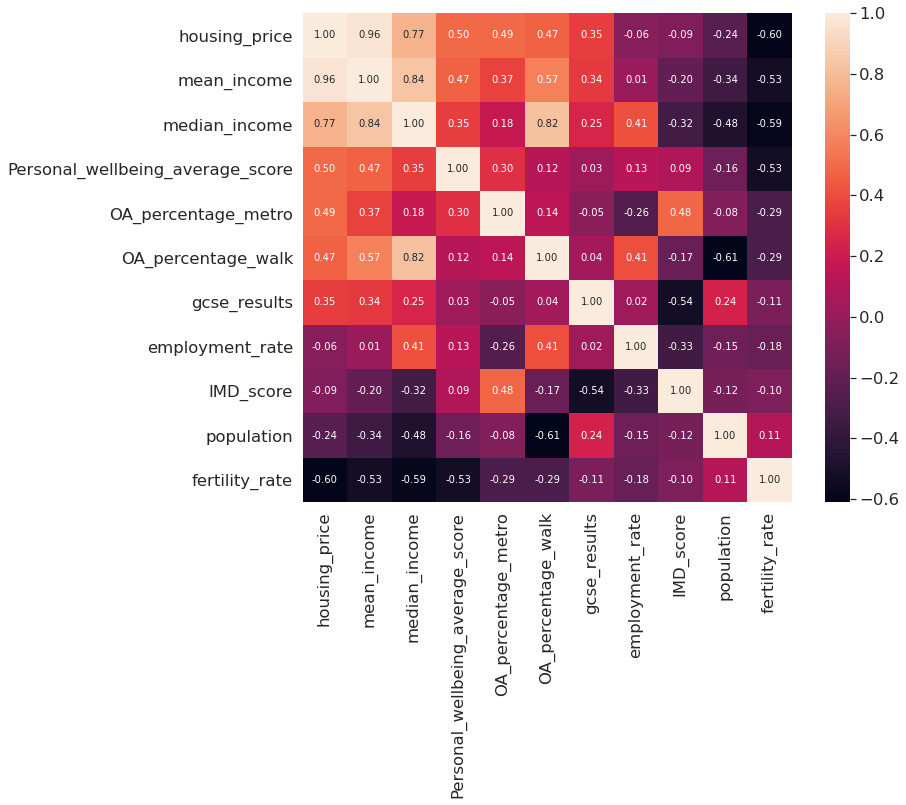

In [6]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df.corrwith(df.housing_price)

housing_price                                                     1.0000000
Personal_wellbeing_average_score                                  0.4961117
mean_income                                                       0.9631177
median_income                                                     0.7658673
employment_rate                                                  -0.0642372
population                                                       -0.2425747
OA_percentage_metro                                               0.4943785
OA_percentage_walk                                                0.4711904
fertility_rate                                                   -0.6016694
gcse_results                                                      0.3492101
IMD_score                                                        -0.0916920
dtype: float64

In [8]:
# forward selection
df_1 = df.loc[:,['housing_price', 'mean_income']]

model_1 = sm.formula.ols('housing_price ~ mean_income', df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     397.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.12e-19
Time:                        16:30:56   Log-Likelihood:                -405.55
No. Observations:                  33   AIC:                             815.1
Df Residuals:                      31   BIC:                             818.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.884e+05   1.93e+04      9.777      0.000    1.49e+05    2.28e+05
mean_income     5.8563      0.294     19.929      0.000       5.257       6.456
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.075
Skew:                          -0.104   Prob(JB):                        0.963
Kurtosis:                       2.892   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df_2 = df.loc[:,['housing_price', 'median_income']]

model_2 = sm.formula.ols('housing_price ~ median_income', df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     43.98
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.06e-07
Time:                        16:30:57   Log-Likelihood:                -434.29
No. Observations:                  33   AIC:                             872.6
Df Residuals:                      31   BIC:                             875.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.075e+05   1.27e+05     -2.416      0.022   -5.67e+05   -4.79e+04
median_income    25.7725      3.886      6.632      0.000      17.846      33.699
==============================================================================
Omnibus:                       19.448   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.535
Skew:                           1.354   Prob(JB):                     5.22e-08
Kurtosis:                       7.130   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df_3 = df.loc[:,['housing_price', 'Personal_wellbeing_average_score']]

model_3 = sm.formula.ols('housing_price ~ Personal_wellbeing_average_score', df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     10.12
Date:                Fri, 05 Aug 2022   Prob (F-statistic):            0.00332
Time:                        16:30:59   Log-Likelihood:                -444.21
No. Observations:                  33   AIC:                             892.4
Df Residuals:                      31   BIC:                             895.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -4.544e+05   3.09e+05     -1.471      0.151   -1.08e+06    1.75e+05
Personal_wellbeing_average_score  3.154e+05   9.92e+04      3.181      0.003    1.13e+05    5.18e+05
==============================================================================
Omnibus:                       10.701   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.628
Skew:                           1.166   Prob(JB):                      0.00811
Kurtosis:                       4.250   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df_4 = df.loc[:,['housing_price', 'OA_percentage_metro']]

model_4 = sm.formula.ols('housing_price ~ OA_percentage_metro', df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     10.03
Date:                Fri, 05 Aug 2022   Prob (F-statistic):            0.00345
Time:                        16:31:00   Log-Likelihood:                -444.24
No. Observations:                  33   AIC:                             892.5
Df Residuals:                      31   BIC:                             895.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.193e+05   7.13e+04      4.481      0.000    1.74e+05    4.65e+05
OA_percentage_metro  1.386e+04   4377.674      3.167      0.003    4934.150    2.28e+04
==============================================================================
Omnibus:                       18.246   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.923
Skew:                           1.486   Prob(JB):                     6.39e-06
Kurtosis:                       5.926   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df_5 = df.loc[:,['housing_price', 'OA_percentage_walk']]

model_5 = sm.formula.ols('housing_price ~ OA_percentage_walk', df_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     8.847
Date:                Fri, 05 Aug 2022   Prob (F-statistic):            0.00564
Time:                        16:31:00   Log-Likelihood:                -444.73
No. Observations:                  33   AIC:                             893.5
Df Residuals:                      31   BIC:                             896.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.235e+05   4.57e+04      9.276      0.000     3.3e+05    5.17e+05
OA_percentage_walk  1.455e+04   4892.252      2.974      0.006    4573.492    2.45e+04
==============================================================================
Omnibus:                       32.321   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.920
Skew:                           2.242   Prob(JB):                     1.20e-17
Kurtosis:                       9.046   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df_6 = df.loc[:,['housing_price', 'gcse_results']]

model_6 = sm.formula.ols('housing_price ~ gcse_results', df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     4.305
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0464
Time:                        16:31:01   Log-Likelihood:                -446.72
No. Observations:                  33   AIC:                             897.4
Df Residuals:                      31   BIC:                             900.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.931e+05   5.39e+05     -1.100      0.280   -1.69e+06    5.06e+05
gcse_results  2.095e+04   1.01e+04      2.075      0.046     357.862    4.16e+04
==============================================================================
Omnibus:                       16.215   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.803
Skew:                           1.420   Prob(JB):                     8.26e-05
Kurtosis:                       5.368   Cond. No.                         875.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df_7 = df.loc[:,['housing_price', 'employment_rate']]

model_7 = sm.formula.ols('housing_price ~ employment_rate', df_7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1284
Date:                Fri, 05 Aug 2022   Prob (F-statistic):              0.722
Time:                        16:31:01   Log-Likelihood:                -448.80
No. Observations:                  33   AIC:                             901.6
Df Residuals:                      31   BIC:                             904.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.273e+05    5.7e+05      1.275      0.212   -4.36e+05    1.89e+06
employment_rate -2725.7435   7605.352     -0.358      0.722   -1.82e+04    1.28e+04
==============================================================================
Omnibus:                       21.564   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.358
Skew:                           1.755   Prob(JB):                     2.56e-07
Kurtosis:                       6.125   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df_8 = df.loc[:,['housing_price', 'IMD_score']]

model_8 = sm.formula.ols('housing_price ~ IMD_score', df_8).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.2628
Date:                Fri, 05 Aug 2022   Prob (F-statistic):              0.612
Time:                        16:31:02   Log-Likelihood:                -448.73
No. Observations:                  33   AIC:                             901.5
Df Residuals:                      31   BIC:                             904.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.725e+05   1.02e+05      5.596      0.000    3.64e+05    7.81e+05
IMD_score  -1979.5993   3861.285     -0.513      0.612   -9854.742    5895.543
==============================================================================
Omnibus:                       24.362   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.068
Skew:                           1.886   Prob(JB):                     3.29e-09
Kurtosis:                       6.766   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df_9 = df.loc[:,['housing_price', 'population']]

model_9 = sm.formula.ols('housing_price ~ population', df_9).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.938
Date:                Fri, 05 Aug 2022   Prob (F-statistic):              0.174
Time:                        16:31:02   Log-Likelihood:                -447.87
No. Observations:                  33   AIC:                             899.7
Df Residuals:                      31   BIC:                             902.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.956e+05   1.28e+05      5.417      0.000    4.34e+05    9.57e+05
population    -0.6346      0.456     -1.392      0.174      -1.564       0.295
==============================================================================
Omnibus:                       22.973   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.640
Skew:                           1.816   Prob(JB):                     3.01e-08
Kurtosis:                       6.464   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df_10 = df.loc[:,['housing_price', 'fertility_rate']]

model_10 = sm.formula.ols('housing_price ~ fertility_rate', df_10).fit()
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     17.59
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           0.000212
Time:                        16:31:02   Log-Likelihood:                -441.45
No. Observations:                  33   AIC:                             886.9
Df Residuals:                      31   BIC:                             889.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.183e+06    1.6e+05      7.402      0.000    8.57e+05    1.51e+06
fertility_rate -1.112e+04   2651.148     -4.194      0.000   -1.65e+04   -5711.918
==============================================================================
Omnibus:                       28.581   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.463
Skew:                           1.966   Prob(JB):                     1.66e-14
Kurtosis:                       8.541   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df_11 = df.loc[:,['housing_price', 'mean_income','median_income']]

model_11 = sm.formula.ols('housing_price ~ mean_income + median_income', df_11).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     207.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.74e-18
Time:                        16:31:03   Log-Likelihood:                -404.38
No. Observations:                  33   AIC:                             814.8
Df Residuals:                      30   BIC:                             819.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.898e+05   7.11e+04      4.078      0.000    1.45e+05    4.35e+05
mean_income       6.5045      0.524     12.402      0.000       5.433       7.576
median_income    -4.2952      2.903     -1.480      0.149     -10.223       1.633
==============================================================================
Omnibus:                        2.210   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.396
Skew:                           0.229   Prob(JB):                        0.497
Kurtosis:                       2.102   Cond. No.                     5.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
df_12 = df.loc[:,['housing_price', 'mean_income','Personal_wellbeing_average_score']]

model_12 = sm.formula.ols('housing_price ~ mean_income + Personal_wellbeing_average_score', df_12).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     199.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.72e-18
Time:                        16:31:03   Log-Likelihood:                -404.98
No. Observations:                  33   AIC:                             816.0
Df Residuals:                      30   BIC:                             820.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.741e+04   1.01e+05      0.868      0.392   -1.18e+05    2.93e+05
mean_income                          5.6966      0.333     17.124      0.000       5.017       6.376
Personal_wellbeing_average_score  3.555e+04   3.48e+04      1.022      0.315   -3.55e+04    1.07e+05
==============================================================================
Omnibus:                        0.050   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.183
Skew:                           0.082   Prob(JB):                        0.913
Kurtosis:                       2.674   Cond. No.                     7.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df_13 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro']]

model_13 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro', df_13).fit()
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     287.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.75e-20
Time:                        16:31:04   Log-Likelihood:                -399.32
No. Observations:                  33   AIC:                             804.6
Df Residuals:                      30   BIC:                             809.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.423e+05   2.05e+04      6.956      0.000       1e+05    1.84e+05
mean_income             5.4937      0.266     20.653      0.000       4.950       6.037
OA_percentage_metro  4548.1132   1226.662      3.708      0.001    2042.935    7053.292
==============================================================================
Omnibus:                        1.477   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                0.608
Skew:                          -0.276   Prob(JB):                        0.738
Kurtosis:                       3.372   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df_14 = df.loc[:,['housing_price', 'mean_income','OA_percentage_walk']]

model_14 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_walk', df_14).fit()
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     224.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           9.04e-19
Time:                        16:31:04   Log-Likelihood:                -403.17
No. Observations:                  33   AIC:                             812.3
Df Residuals:                      30   BIC:                             816.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.899e+05   1.82e+04     10.413      0.000    1.53e+05    2.27e+05
mean_income            6.2759      0.339     18.504      0.000       5.583       6.969
OA_percentage_walk -3718.0251   1722.523     -2.158      0.039   -7235.886    -200.164
==============================================================================
Omnibus:                        3.610   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.171
Skew:                           0.402   Prob(JB):                        0.338
Kurtosis:                       2.034   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df_15 = df.loc[:,['housing_price', 'mean_income','gcse_results']]

model_15 = sm.formula.ols('housing_price ~ mean_income + gcse_results', df_15).fit()
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.77e-18
Time:                        16:31:04   Log-Likelihood:                -405.38
No. Observations:                  33   AIC:                             816.8
Df Residuals:                      30   BIC:                             821.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.001e+05   1.61e+05      0.622      0.539   -2.29e+05    4.29e+05
mean_income      5.7977      0.316     18.372      0.000       5.153       6.442
gcse_results  1720.8453   3114.286      0.553      0.585   -4639.376    8081.067
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.062
Skew:                          -0.034   Prob(JB):                        0.970
Kurtosis:                       2.799   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df_16 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_16 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_16).fit()
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     229.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.48e-19
Time:                        16:31:05   Log-Likelihood:                -402.80
No. Observations:                  33   AIC:                             811.6
Df Residuals:                      30   BIC:                             816.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.48e+05   7.08e+04      4.917      0.000    2.03e+05    4.93e+05
mean_income        5.4536      0.325     16.800      0.000       4.791       6.117
fertility_rate -2300.0592    986.603     -2.331      0.027   -4314.970    -285.148
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.675
Skew:                          -0.011   Prob(JB):                        0.714
Kurtosis:                       2.300   Cond. No.                     5.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df_17 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','median_income']]

model_17 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + median_income', df_17).fit()
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     189.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.76e-19
Time:                        16:31:05   Log-Likelihood:                -398.93
No. Observations:                  33   AIC:                             805.9
Df Residuals:                      29   BIC:                             811.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.959e+05   6.73e+04      2.911      0.007    5.82e+04    3.34e+05
mean_income             5.8406      0.493     11.843      0.000       4.832       6.849
OA_percentage_metro  4286.9891   1271.687      3.371      0.002    1686.097    6887.881
median_income          -2.1606      2.581     -0.837      0.409      -7.440       3.119
==============================================================================
Omnibus:                        0.043   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.054
Skew:                           0.019   Prob(JB):                        0.973
Kurtosis:                       2.805   Cond. No.                     6.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
df_18 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','Personal_wellbeing_average_score']]

model_18 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + Personal_wellbeing_average_score', df_18).fit()
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     187.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.30e-19
Time:                        16:31:06   Log-Likelihood:                -399.08
No. Observations:                  33   AIC:                             806.2
Df Residuals:                      29   BIC:                             812.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.812e+04   8.57e+04      1.028      0.312   -8.71e+04    2.63e+05
mean_income                          5.4160      0.294     18.427      0.000       4.815       6.017
OA_percentage_metro               4424.1690   1253.152      3.530      0.001    1861.185    6987.153
Personal_wellbeing_average_score  1.949e+04   2.99e+04      0.651      0.520   -4.17e+04    8.07e+04
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.097
Skew:                          -0.115   Prob(JB):                        0.953
Kurtosis:                       3.133   Cond. No.                     7.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df_19 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','OA_percentage_walk']]

model_19 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + OA_percentage_walk', df_19).fit()
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     218.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.29e-20
Time:                        16:31:06   Log-Likelihood:                -396.70
No. Observations:                  33   AIC:                             801.4
Df Residuals:                      29   BIC:                             807.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.459e+05   1.93e+04      7.569      0.000    1.06e+05    1.85e+05
mean_income             5.8772      0.303     19.396      0.000       5.258       6.497
OA_percentage_metro  4316.3440   1156.801      3.731      0.001    1950.421    6682.267
OA_percentage_walk  -3234.9026   1445.879     -2.237      0.033   -6192.057    -277.748
==============================================================================
Omnibus:                        0.752   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.599
Skew:                           0.315   Prob(JB):                        0.741
Kurtosis:                       2.803   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df_20 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','gcse_results']]

model_20 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + gcse_results', df_20).fit()
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     199.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.85e-19
Time:                        16:31:07   Log-Likelihood:                -398.12
No. Observations:                  33   AIC:                             804.2
Df Residuals:                      29   BIC:                             810.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -5.86e+04   1.37e+05     -0.427      0.673   -3.39e+05    2.22e+05
mean_income             5.3333      0.283     18.877      0.000       4.755       5.911
OA_percentage_metro  4918.6126   1228.914      4.002      0.000    2405.202    7432.023
gcse_results         3839.9136   2596.806      1.479      0.150   -1471.151    9150.978
==============================================================================
Omnibus:                        0.562   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.082
Skew:                          -0.093   Prob(JB):                        0.960
Kurtosis:                       3.157   Cond. No.                     1.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
df_21 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate']]

model_21 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate', df_21).fit()
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     220.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.59e-20
Time:                        16:31:07   Log-Likelihood:                -396.53
No. Observations:                  33   AIC:                             801.1
Df Residuals:                      29   BIC:                             807.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.796e+05   6.24e+04      4.480      0.000    1.52e+05    4.07e+05
mean_income             5.1810      0.283     18.305      0.000       4.602       5.760
OA_percentage_metro  4227.3115   1154.848      3.660      0.001    1865.382    6589.241
fertility_rate      -1932.3218    835.955     -2.312      0.028   -3642.042    -222.602
==============================================================================
Omnibus:                        3.233   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.939
Skew:                          -0.528   Prob(JB):                        0.379
Kurtosis:                       3.545   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df_22 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','median_income']]

model_22 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + median_income', df_22).fit()
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     181.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.39e-19
Time:                        16:31:07   Log-Likelihood:                -394.54
No. Observations:                  33   AIC:                             799.1
Df Residuals:                      28   BIC:                             806.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.349e+05   1.01e+05      4.286      0.000    2.27e+05    6.43e+05
mean_income             5.8362      0.439     13.281      0.000       4.936       6.736
OA_percentage_metro  3572.4187   1159.212      3.082      0.005    1197.882    5946.956
fertility_rate      -2494.1395    854.068     -2.920      0.007   -4243.619    -744.659
median_income          -4.6469      2.452     -1.895      0.068      -9.670       0.377
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.139
Skew:                          -0.129   Prob(JB):                        0.933
Kurtosis:                       3.186   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df_23 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','Personal_wellbeing_average_score']]

model_23 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + Personal_wellbeing_average_score', df_23).fit()
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     160.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           7.39e-19
Time:                        16:31:08   Log-Likelihood:                -396.52
No. Observations:                  33   AIC:                             803.0
Df Residuals:                      28   BIC:                             810.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.959e+05   1.25e+05      2.363      0.025    3.94e+04    5.52e+05
mean_income                          5.1910      0.296     17.565      0.000       4.586       5.796
OA_percentage_metro               4247.9966   1182.780      3.592      0.001    1825.181    6670.812
fertility_rate                   -1982.8181    913.863     -2.170      0.039   -3854.782    -110.854
Personal_wellbeing_average_score -4571.6233   3.03e+04     -0.151      0.881   -6.66e+04    5.75e+04
==============================================================================
Omnibus:                        3.941   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.504
Skew:                          -0.588   Prob(JB):                        0.286
Kurtosis:                       3.663   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df_24 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_24 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_24).fit()
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.48e-20
Time:                        16:31:08   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_25 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','gcse_results']]

model_25 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + gcse_results', df_25).fit()
model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     178.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.74e-19
Time:                        16:31:09   Log-Likelihood:                -394.81
No. Observations:                  33   AIC:                             799.6
Df Residuals:                      28   BIC:                             807.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.592e+04   1.36e+05      0.485      0.631   -2.12e+05    3.44e+05
mean_income             4.9917      0.294     16.982      0.000       4.390       5.594
OA_percentage_metro  4618.4001   1137.652      4.060      0.000    2288.025    6948.775
fertility_rate      -2018.0571    809.016     -2.494      0.019   -3675.251    -360.863
gcse_results         4200.8247   2394.847      1.754      0.090    -704.797    9106.447
==============================================================================
Omnibus:                        1.952   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.034
Skew:                          -0.406   Prob(JB):                        0.596
Kurtosis:                       3.307   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
df_26 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','median_income']]

model_26 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + median_income', df_26).fit()
model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     149.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           8.21e-19
Time:                        16:31:09   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             798.9
Df Residuals:                      27   BIC:                             807.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.819e+05    1.5e+05      1.875      0.072   -2.65e+04     5.9e+05
mean_income             5.5637      0.477     11.669      0.000       4.585       6.542
OA_percentage_metro  4000.9873   1184.379      3.378      0.002    1570.843    6431.132
fertility_rate      -1913.4565    943.041     -2.029      0.052   -3848.417      21.504
OA_percentage_walk  -3200.7549   2348.686     -1.363      0.184   -8019.860    1618.351
median_income          -0.0011      4.178     -0.000      1.000      -8.574       8.572
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df_27 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','Personal_wellbeing_average_score']]

model_27 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + Personal_wellbeing_average_score', df_27).fit()
model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     152.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.50e-19
Time:                        16:31:10   Log-Likelihood:                -393.16
No. Observations:                  33   AIC:                             798.3
Df Residuals:                      27   BIC:                             807.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3.517e+05   1.17e+05      2.997      0.006    1.11e+05    5.93e+05
mean_income                          5.6307      0.325     17.328      0.000       4.964       6.297
OA_percentage_metro               4075.4369   1090.114      3.739      0.001    1838.708    6312.165
fertility_rate                   -2128.3343    842.596     -2.526      0.018   -3857.199    -399.470
OA_percentage_walk               -3402.7581   1377.887     -2.470      0.020   -6229.948    -575.569
Personal_wellbeing_average_score -1.957e+04   2.85e+04     -0.686      0.498   -7.81e+04    3.89e+04
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.012
Skew:                          -0.257   Prob(JB):                        0.603
Kurtosis:                       3.687   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
df_28 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results']]

model_28 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results', df_28).fit()
model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     160.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.39e-19
Time:                        16:31:10   Log-Likelihood:                -392.36
No. Observations:                  33   AIC:                             796.7
Df Residuals:                      27   BIC:                             805.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.218e+05   1.31e+05      0.928      0.362   -1.48e+05    3.91e+05
mean_income             5.3742      0.333     16.125      0.000       4.690       6.058
OA_percentage_metro  4321.8362   1085.006      3.983      0.000    2095.588    6548.085
fertility_rate      -1979.8066    765.105     -2.588      0.015   -3549.672    -409.941
OA_percentage_walk  -2801.0043   1346.963     -2.079      0.047   -5564.744     -37.264
gcse_results         3141.2734   2320.829      1.354      0.187   -1620.674    7903.221
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.134
Skew:                           0.000   Prob(JB):                        0.935
Kurtosis:                       3.312   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df_29 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','median_income']]

model_29 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + median_income', df_29).fit()
model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     128.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.48e-18
Time:                        16:31:11   Log-Likelihood:                -392.34
No. Observations:                  33   AIC:                             798.7
Df Residuals:                      26   BIC:                             809.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.451e+05    1.8e+05      0.807      0.427   -2.24e+05    5.15e+05
mean_income             5.4397      0.479     11.360      0.000       4.455       6.424
OA_percentage_metro  4241.0853   1180.731      3.592      0.001    1814.059    6668.112
fertility_rate      -2080.9749    937.632     -2.219      0.035   -4008.305    -153.645
OA_percentage_walk  -2422.4021   2385.901     -1.015      0.319   -7326.691    2481.887
gcse_results         3208.0532   2388.284      1.343      0.191   -1701.136    8117.242
median_income          -0.8069      4.161     -0.194      0.848      -9.360       7.746
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.104
Skew:                          -0.007   Prob(JB):                        0.949
Kurtosis:                       3.275   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df_30 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score']]

model_30 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score', df_30).fit()
model_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.09e-18
Time:                        16:31:11   Log-Likelihood:                -392.22
No. Observations:                  33   AIC:                             798.4
Df Residuals:                      26   BIC:                             808.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.799e+05   1.81e+05      0.992      0.331   -1.93e+05    5.53e+05
mean_income                          5.4322      0.360     15.096      0.000       4.693       6.172
OA_percentage_metro               4353.4803   1103.016      3.947      0.001    2086.198    6620.763
fertility_rate                   -2124.2537    834.582     -2.545      0.017   -3839.762    -408.745
OA_percentage_walk               -2964.7860   1410.205     -2.102      0.045   -5863.504     -66.068
gcse_results                      2948.3013   2390.258      1.233      0.228   -1964.945    7861.547
Personal_wellbeing_average_score -1.352e+04   2.87e+04     -0.472      0.641   -7.24e+04    4.54e+04
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                0.618
Skew:                          -0.175   Prob(JB):                        0.734
Kurtosis:                       3.572   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
df_31 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income']]

model_31 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income', df_31).fit()
model_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     107.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.81e-17
Time:                        16:31:11   Log-Likelihood:                -392.19
No. Observations:                  33   AIC:                             800.4
Df Residuals:                      25   BIC:                             812.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.053e+05   2.23e+05      0.919      0.367   -2.55e+05    6.65e+05
mean_income                          5.5025      0.504     10.910      0.000       4.464       6.541
OA_percentage_metro               4268.0084   1200.254      3.556      0.002    1796.038    6739.978
fertility_rate                   -2233.4079   1006.226     -2.220      0.036   -4305.770    -161.046
OA_percentage_walk               -2564.2227   2441.448     -1.050      0.304   -7592.479    2464.033
gcse_results                      3017.1087   2459.075      1.227      0.231   -2047.451    8081.669
Personal_wellbeing_average_score -1.367e+04   2.92e+04     -0.468      0.644   -7.39e+04    4.65e+04
median_income                       -0.8577      4.226     -0.203      0.841      -9.561       7.846
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.585
Skew:                          -0.181   Prob(JB):                        0.746
Kurtosis:                       3.542   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# final model
df_final1 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_final1 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_final1).fit()
model_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.48e-20
Time:                        16:31:12   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# backward selection
df_32 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income']]

model_32 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income', df_32).fit()
model_32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     107.2
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.81e-17
Time:                        16:31:12   Log-Likelihood:                -392.19
No. Observations:                  33   AIC:                             800.4
Df Residuals:                      25   BIC:                             812.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.053e+05   2.23e+05      0.919      0.367   -2.55e+05    6.65e+05
mean_income                          5.5025      0.504     10.910      0.000       4.464       6.541
OA_percentage_metro               4268.0084   1200.254      3.556      0.002    1796.038    6739.978
fertility_rate                   -2233.4079   1006.226     -2.220      0.036   -4305.770    -161.046
OA_percentage_walk               -2564.2227   2441.448     -1.050      0.304   -7592.479    2464.033
gcse_results                      3017.1087   2459.075      1.227      0.231   -2047.451    8081.669
Personal_wellbeing_average_score -1.367e+04   2.92e+04     -0.468      0.644   -7.39e+04    4.65e+04
median_income                       -0.8577      4.226     -0.203      0.841      -9.561       7.846
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.585
Skew:                          -0.181   Prob(JB):                        0.746
Kurtosis:                       3.542   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df_33 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score']]

model_33 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score', df_33).fit()
model_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     129.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.09e-18
Time:                        16:31:13   Log-Likelihood:                -392.22
No. Observations:                  33   AIC:                             798.4
Df Residuals:                      26   BIC:                             808.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.799e+05   1.81e+05      0.992      0.331   -1.93e+05    5.53e+05
mean_income                          5.4322      0.360     15.096      0.000       4.693       6.172
OA_percentage_metro               4353.4803   1103.016      3.947      0.001    2086.198    6620.763
fertility_rate                   -2124.2537    834.582     -2.545      0.017   -3839.762    -408.745
OA_percentage_walk               -2964.7860   1410.205     -2.102      0.045   -5863.504     -66.068
gcse_results                      2948.3013   2390.258      1.233      0.228   -1964.945    7861.547
Personal_wellbeing_average_score -1.352e+04   2.87e+04     -0.472      0.641   -7.24e+04    4.54e+04
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                0.618
Skew:                          -0.175   Prob(JB):                        0.734
Kurtosis:                       3.572   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df_34 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results']]

model_34 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results', df_34).fit()
model_34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     160.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.39e-19
Time:                        16:31:13   Log-Likelihood:                -392.36
No. Observations:                  33   AIC:                             796.7
Df Residuals:                      27   BIC:                             805.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.218e+05   1.31e+05      0.928      0.362   -1.48e+05    3.91e+05
mean_income             5.3742      0.333     16.125      0.000       4.690       6.058
OA_percentage_metro  4321.8362   1085.006      3.983      0.000    2095.588    6548.085
fertility_rate      -1979.8066    765.105     -2.588      0.015   -3549.672    -409.941
OA_percentage_walk  -2801.0043   1346.963     -2.079      0.047   -5564.744     -37.264
gcse_results         3141.2734   2320.829      1.354      0.187   -1620.674    7903.221
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.134
Skew:                           0.000   Prob(JB):                        0.935
Kurtosis:                       3.312   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
df_35 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_35 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_35).fit()
model_35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.48e-20
Time:                        16:31:13   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
df_final2 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_final2 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_final2).fit()
model_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           5.48e-20
Time:                        16:31:14   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [46]:
df_final2 = drop_column_using_vif_(df_final2.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
df_36 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income','IMD_score','population']]

model_36 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income + IMD_score + population', df_36).fit()
model_36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     79.14
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.68e-15
Time:                        16:31:15   Log-Likelihood:                -391.70
No. Observations:                  33   AIC:                             803.4
Df Residuals:                      23   BIC:                             818.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         5.412e+04   3.15e+05      0.172      0.865   -5.97e+05    7.05e+05
mean_income                          5.4746      0.525     10.435      0.000       4.389       6.560
OA_percentage_metro               3714.8466   1459.980      2.544      0.018     694.648    6735.045
fertility_rate                   -1764.1769   1197.706     -1.473      0.154   -4241.821     713.468
OA_percentage_walk               -2499.2336   2691.668     -0.929      0.363   -8067.373    3068.905
gcse_results                      3335.4004   2963.940      1.125      0.272   -2795.977    9466.778
Personal_wellbeing_average_score -1.008e+04   3.04e+04     -0.332      0.743   -7.29e+04    5.27e+04
median_income                        0.8121      4.968      0.163      0.872      -9.465      11.089
IMD_score                          953.5396   1451.188      0.657      0.518   -2048.472    3955.551
population                           0.0993      0.141      0.704      0.488      -0.192       0.391
==============================================================================
Omnibus:                        2.734   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                1.496
Skew:                          -0.426   Prob(JB):                        0.473
Kurtosis:                       3.603   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
df_37 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','IMD_score','population']]

model_37 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + IMD_score + population', df_37).fit()
model_37.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     92.79
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.71e-16
Time:                        16:31:15   Log-Likelihood:                -391.72
No. Observations:                  33   AIC:                             801.4
Df Residuals:                      24   BIC:                             814.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.961e+04   2.23e+05      0.402      0.691   -3.71e+05     5.5e+05
mean_income                          5.5310      0.387     14.286      0.000       4.732       6.330
OA_percentage_metro               3715.2236   1430.068      2.598      0.016     763.708    6666.739
fertility_rate                   -1890.0981    898.297     -2.104      0.046   -3744.093     -36.104
OA_percentage_walk               -2171.2018   1757.046     -1.236      0.229   -5797.566    1455.162
gcse_results                      3292.8379   2891.994      1.139      0.266   -2675.945    9261.620
Personal_wellbeing_average_score -1.039e+04   2.97e+04     -0.350      0.729   -7.17e+04    5.09e+04
IMD_score                          838.4204   1242.841      0.675      0.506   -1726.677    3403.518
population                           0.0949      0.136      0.700      0.491      -0.185       0.375
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.452
Skew:                          -0.402   Prob(JB):                        0.484
Kurtosis:                       3.639   Cond. No.                     9.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
df_38 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','IMD_score','population']]

model_38 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + IMD_score + population', df_38).fit()
model_38.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     109.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.59e-17
Time:                        16:31:16   Log-Likelihood:                -391.80
No. Observations:                  33   AIC:                             799.6
Df Residuals:                      25   BIC:                             811.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             4.29e+04   1.76e+05      0.244      0.809   -3.19e+05    4.04e+05
mean_income             5.4916      0.364     15.091      0.000       4.742       6.241
OA_percentage_metro  3670.8931   1399.232      2.624      0.015     789.120    6552.666
fertility_rate      -1770.3506    815.937     -2.170      0.040   -3450.805     -89.896
OA_percentage_walk  -1998.9530   1656.905     -1.206      0.239   -5411.413    1413.507
gcse_results         3419.3507   2818.532      1.213      0.236   -2385.524    9224.225
IMD_score             861.4364   1219.128      0.707      0.486   -1649.404    3372.277
population              0.1015      0.132      0.770      0.448      -0.170       0.373
==============================================================================
Omnibus:                        1.498   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.599
Skew:                          -0.257   Prob(JB):                        0.741
Kurtosis:                       3.413   Cond. No.                     7.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
df_39 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','population']]

model_39 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + population', df_39).fit()
model_39.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     130.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           3.81e-18
Time:                        16:31:16   Log-Likelihood:                -392.13
No. Observations:                  33   AIC:                             798.3
Df Residuals:                      26   BIC:                             808.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.229e+05   1.33e+05      0.925      0.363    -1.5e+05    3.96e+05
mean_income             5.4141      0.344     15.758      0.000       4.708       6.120
OA_percentage_metro  4271.1248   1101.115      3.879      0.001    2007.750    6534.499
fertility_rate      -1919.2169    780.642     -2.459      0.021   -3523.849    -314.585
OA_percentage_walk  -2317.6754   1578.899     -1.468      0.154   -5563.149     927.799
gcse_results         2574.4466   2527.626      1.019      0.318   -2621.163    7770.056
population              0.0762      0.126      0.606      0.549      -0.182       0.334
==============================================================================
Omnibus:                        1.992   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                0.919
Skew:                           0.056   Prob(JB):                        0.632
Kurtosis:                       3.810   Cond. No.                     5.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
import os
import geopandas as gpd
import matplotlib.cm as cm
from requests import get
from urllib.parse import urlparse

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [52]:
import os
path = os.getcwd()
path

'/mnt/c/Users/Shirao/Documents/MSc Dissertation'

In [53]:
fp = path + '/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp)
map_df

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,"11,445.7350000",210.7630000,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,"11,570.0630000",0.0000000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,"5,046.3300000",0.0000000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,"4,323.2700000",0.0000000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,"8,674.8370000",0.0000000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


<AxesSubplot:>

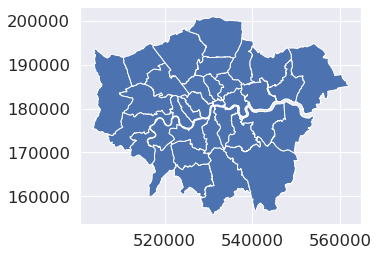

In [54]:
map_df.plot()

In [55]:
df2 = df = pd.read_csv('borough_data.csv',low_memory=False)

In [56]:
merged = map_df.set_index('GSS_CODE').join(df2.set_index('GSS_CODE'))
merged.head()

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,London_borough,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
GSS_CODE,,,,,,,,,,,,,,,,,,,
E09000021,Kingston upon Thames,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,487328,2.8100000,50500,33500,78.2000000,326034,5.0500000,6.7500000,51,58.9000000,11.6600000
E09000008,Croydon,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,365678,2.9300000,37800,29400,76.1000000,341806,4.2800000,4.8500000,67,48.9000000,22.7600000
E09000006,Bromley,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,436486,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000
E09000018,Hounslow,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,401072,3.1400000,41700,27500,71.8000000,242467,10.3700000,5.0000000,69,52.6000000,21.8400000
E09000009,Ealing,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,472620,3.4000000,42700,28200,73.0000000,333794,17.8000000,4.7500000,70,53.5000000,25.0100000


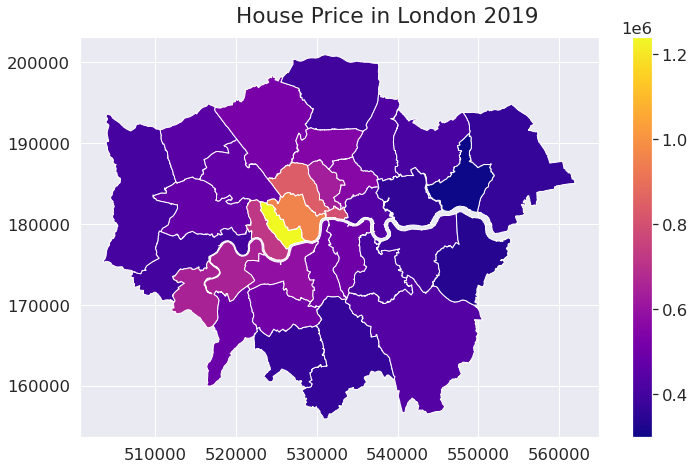

In [57]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merged.plot(column='housing_price', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle('House Price in London 2019');

In [58]:
df3 = pd.read_csv('borough_data_residual.csv',low_memory=False)

In [59]:
merged2 = map_df.set_index('GSS_CODE').join(df3.set_index('GSS_CODE'))
merged2.head()

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,London_borough,residual
GSS_CODE,,,,,,,,,
E09000021,Kingston upon Thames,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,"24,207.1844800"
E09000008,Croydon,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,626.3138065
E09000006,Bromley,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,"7,986.0641180"
E09000018,Hounslow,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,"-6,696.2305050"
E09000009,Ealing,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,"30,264.5835000"


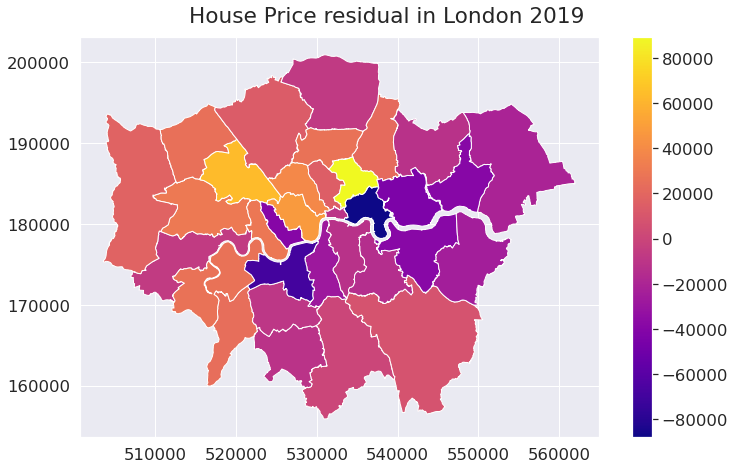

In [60]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merged2.plot(column='residual', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle('House Price residual in London 2019');

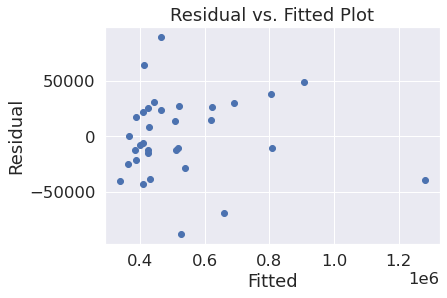

In [61]:
# plot 
plt.scatter(model_final2.fittedvalues, model_final2.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

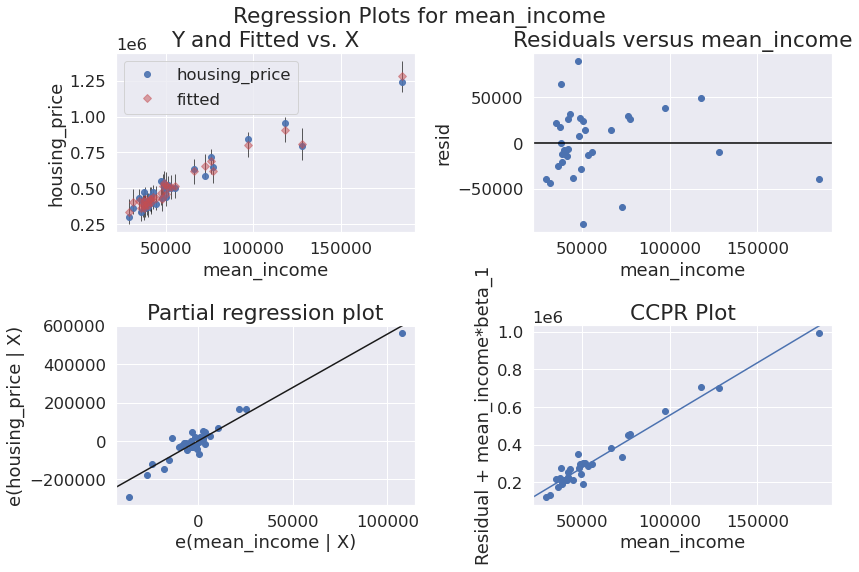

In [62]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'mean_income', fig=fig)

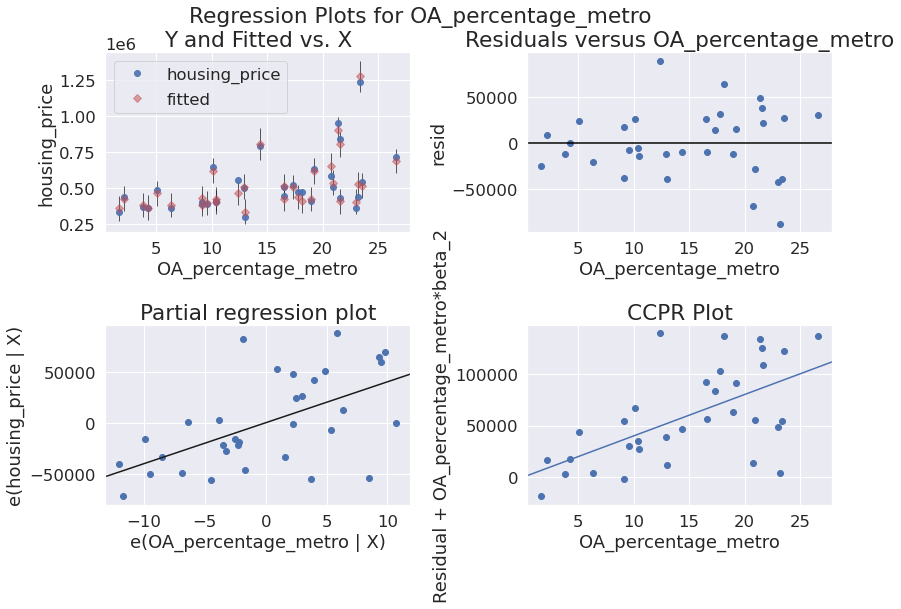

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'OA_percentage_metro', fig=fig)

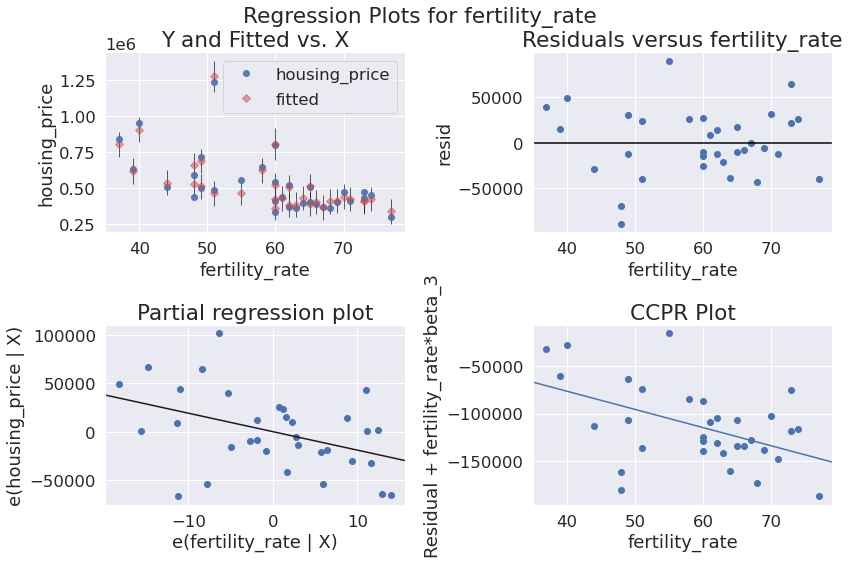

In [64]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'fertility_rate', fig=fig)

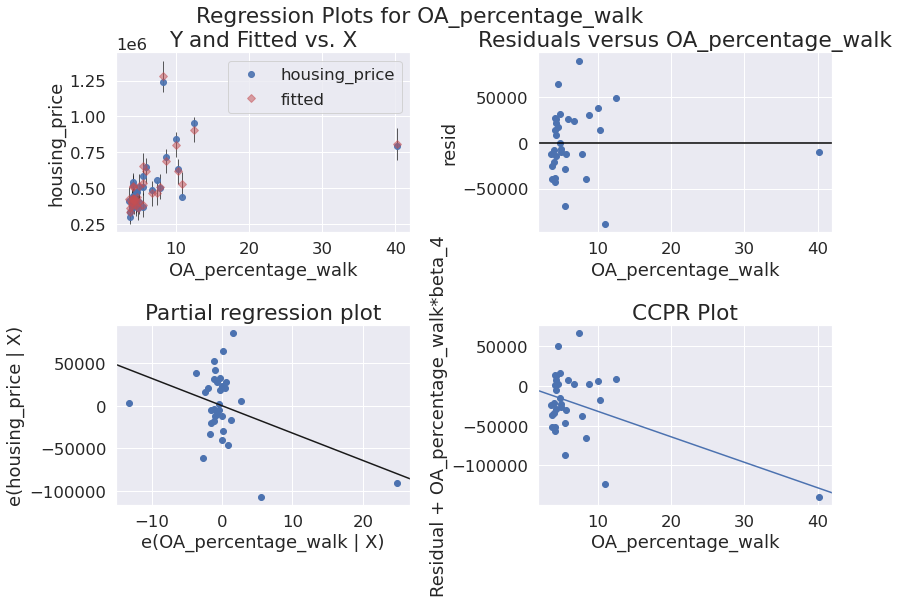

In [65]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'OA_percentage_walk', fig=fig)

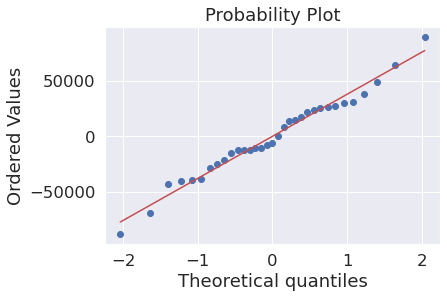

In [66]:
resid = model_final2.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [67]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt
import sklearn.metrics as sklm

import libpysal
import warnings

In [68]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [69]:
ppd = pd.merge(map_df, df, left_on='GSS_CODE', right_on='GSS_CODE', how='inner').reset_index()
ppd.shape

(33, 21)

In [70]:
ppd.head()

,index,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,London_borough,...,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
0,0,Kingston upon Thames,E09000021,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,...,2.8100000,50500,33500,78.2000000,326034,5.0500000,6.7500000,51,58.9000000,11.6600000
1,1,Croydon,E09000008,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,...,2.9300000,37800,29400,76.1000000,341806,4.2800000,4.8500000,67,48.9000000,22.7600000
2,2,Bromley,E09000006,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,...,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000
3,3,Hounslow,E09000018,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,...,3.1400000,41700,27500,71.8000000,242467,10.3700000,5.0000000,69,52.6000000,21.8400000
4,4,Ealing,E09000009,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,...,3.4000000,42700,28200,73.0000000,333794,17.8000000,4.7500000,70,53.5000000,25.0100000


In [71]:
raw = ppd[['GSS_CODE','Personal_wellbeing_average_score','mean_income', 'median_income','employment_rate','population','OA_percentage_metro','OA_percentage_walk','fertility_rate','gcse_results','IMD_score','housing_price']].set_index('GSS_CODE').copy()
raw.head()

,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score,housing_price
GSS_CODE,,,,,,,,,,,
E09000021,2.8100000,50500,33500,78.2000000,326034,5.0500000,6.7500000,51,58.9000000,11.6600000,487328
E09000008,2.9300000,37800,29400,76.1000000,341806,4.2800000,4.8500000,67,48.9000000,22.7600000,365678
E09000006,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000,436486
E09000018,3.1400000,41700,27500,71.8000000,242467,10.3700000,5.0000000,69,52.6000000,21.8400000,401072
E09000009,3.4000000,42700,28200,73.0000000,333794,17.8000000,4.7500000,70,53.5000000,25.0100000,472620


In [72]:
normed = raw.copy()
for c in raw.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of Personal_wellbeing_average_score is [-1.1480362537764355, 0.891238670694864]
The range of mean_income is [-0.3137116672541416, 2.4286217835741977]
The range of median_income is [-0.49295774647887325, 2.112676056338028]
The range of employment_rate is [-0.8994197292069627, 1.1605415860735007]
The range of population is [-1.7527055049204714, 0.779654970246332]
The range of OA_percentage_metro is [-0.7909333333333335, 0.5413333333333333]
The range of OA_percentage_walk is [-0.19604666234607898, 5.722618276085547]
The range of fertility_rate is [-0.8633093525179857, 0.5755395683453238]
The range of gcse_results is [-0.5731707317073177, 1.0]
The range of IMD_score is [-0.67566305565932, 0.8545013074336943]
The range of housing_price is [-0.41799637459221356, 1.843890170962105]


,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score,housing_price
GSS_CODE,,,,,,,,,,,
E09000021,-0.4380665,0.0581600,0.2904930,0.2901354,0.3216767,-0.6106667,0.3078419,-0.3597122,0.7073171,-0.6037542,0.0352755
E09000008,-0.2567976,-0.1656680,-0.0704225,0.0870406,0.4251096,-0.6517333,0.0000000,0.2158273,-0.5121951,-0.0854501,-0.2564887
E09000006,-0.3323263,0.0176243,0.3080986,0.3965184,0.3630052,-0.7658667,-0.1053143,0.0000000,0.1707317,-0.4501307,-0.0866635
E09000018,0.0604230,-0.0969334,-0.2376761,-0.3288201,-0.2263561,-0.3269333,0.0243033,0.2877698,-0.0609756,-0.1284087,-0.1716001
E09000009,0.4531722,-0.0793091,-0.1760563,-0.2127660,0.3725668,0.0693333,-0.0162022,0.3237410,0.0487805,0.0196115,0.0000000


In [73]:
k_range = range(1,11)
cluster_ids_series = [np.nan]
cluster_sse_series = [np.nan]
cluster_cns_series = [np.nan]
cluster_shs_series = [np.nan]

for k in k_range:
    
    km_output = sklearn.cluster.KMeans(n_clusters = k, n_init = 100).fit(normed)
    
    cluster_ids_series.append(km_output.labels_)
    cluster_sse_series.append(km_output.inertia_)
    cluster_cns_series.append(km_output.cluster_centers_)
    
    try:
        cluster_shs_series.append(sklm.silhouette_score(normed,km_output.labels_))
    except:
        cluster_shs_series.append(0)
        
report_dict = {'SSE':cluster_sse_series, 'Silhouette Score':cluster_shs_series}
report_df = pd.DataFrame(report_dict, index = range(11))
report_df = report_df.dropna(how ='any')

optimal_k_by_silhouette_score = report_df['Silhouette Score'].argmax()
optimal_silhouette_score = report_df.loc[optimal_k_by_silhouette_score, 'Silhouette Score']

report_df

,SSE,Silhouette Score
1,103.2038903,0.0000000
2,62.3120813,0.6928006
3,42.1673724,0.3003374
4,33.4089490,0.2205251
5,26.3384018,0.2229625
6,22.9354093,0.2148320
7,20.1997877,0.1568512
8,18.1027292,0.1691182
9,16.1031379,0.1785968
10,14.4091158,0.1871491


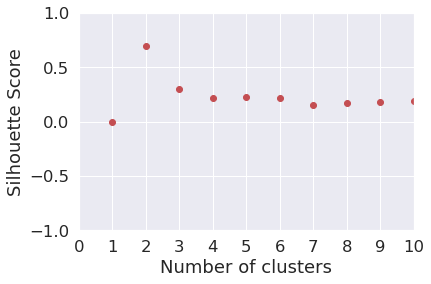

In [74]:
fignum = 11
plt.plot(report_df.index,report_df['Silhouette Score'],'ro')

plt.gca().set_xlim([0,10])
plt.gca().set_xticks(range(11))
plt.gca().set_ylim([-1,1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

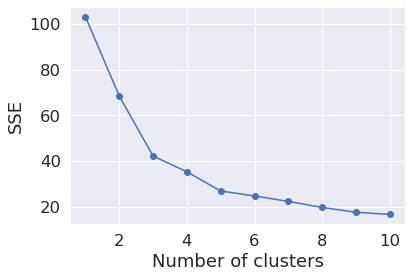

In [75]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [76]:
def mapping_clusters(labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

[[ 4.86740517e-01  7.23377590e-01  6.24021909e-01  1.71932087e-02
  -1.03096938e-01  1.68948148e-01  5.53755311e-01 -5.35571543e-01
   1.13821138e-01  4.10907733e-02  6.35581868e-01]
 [-1.92433994e-01 -9.28721399e-02 -7.92253521e-02 -1.05542007e-01
   6.56653030e-02 -1.98005797e-01  9.86221083e-04  1.26681264e-01
  -1.32555673e-02  3.21173929e-02 -1.08392777e-01]
 [ 0.00000000e+00  1.42403948e+00  2.11267606e+00  1.16054159e+00
  -1.75270550e+00 -1.15733333e-01  5.72261828e+00 -3.59712230e-02
  -1.21951220e-02 -6.27568173e-01  7.79201249e-01]]


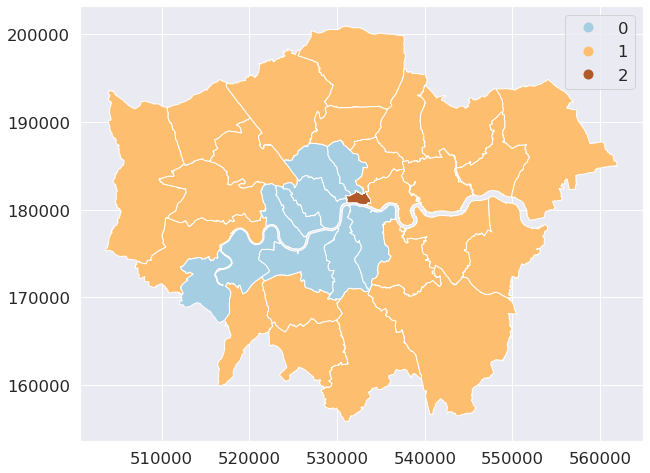

In [78]:
k_cluster = 3
random_seed = 123
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)
clustering_center= kmeans_method.cluster_centers_
print(clustering_center)

# plotting
mapping_clusters(kmeans_method.labels_);

[[-1.41616314e-03  1.36698097e-01  1.18562940e-01 -7.10227273e-02
   1.82009228e-02 -9.48000000e-02  1.56452528e-01 -5.95773381e-02
   2.24847561e-02  3.46411561e-02  1.00850092e-01]
 [ 0.00000000e+00  1.42403948e+00  2.11267606e+00  1.16054159e+00
  -1.75270550e+00 -1.15733333e-01  5.72261828e+00 -3.59712230e-02
  -1.21951220e-02 -6.27568173e-01  7.79201249e-01]]


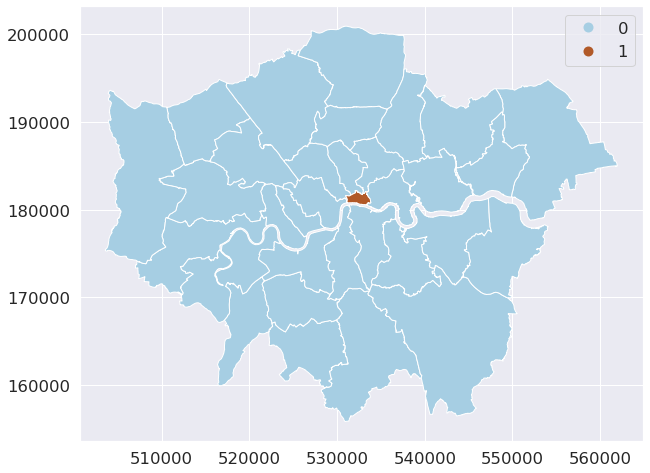

In [79]:
k_cluster = 2
random_seed = 12
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)
clustering_center= kmeans_method.cluster_centers_
print(clustering_center)
# plotting
mapping_clusters(kmeans_method.labels_);